In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [17]:
image_path = "../../output/cropped_img.jpg"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

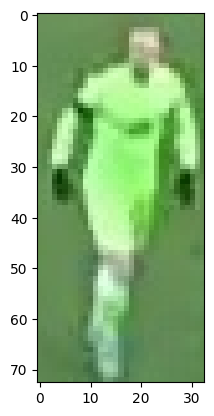

In [18]:
plt.imshow(img)
plt.show()

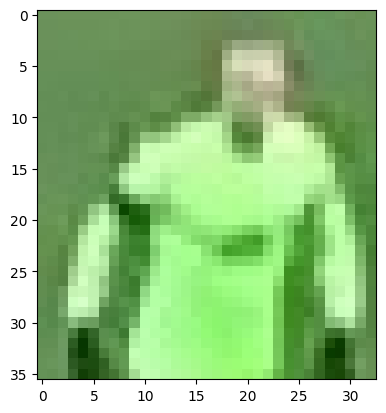

In [23]:
top_half_img = img[0: int(img.shape[0]/2), :]
plt.imshow(top_half_img)
plt.show()

In [24]:
img_2d = top_half_img.reshape(-1, 3)

kmeans = KMeans(n_clusters=2, random_state=0).fit(img_2d)

In [25]:
labels = kmeans.labels_
clustered_img = labels.reshape(top_half_img.shape[0], top_half_img.shape[1])

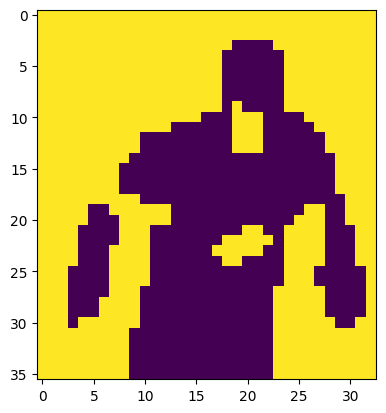

In [26]:
plt.imshow(clustered_img)
plt.show()

In [28]:
corner_clusters = [
    clustered_img[0, 0],
    clustered_img[0, -1],
    clustered_img[-1, 0],
    clustered_img[-1, -1],
]

non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [29]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

0


In [30]:
kmeans.cluster_centers_[player_cluster]

array([173.16283925, 237.95615866, 148.20876827])

In [31]:
kmeans.cluster_centers_[non_player_cluster]

array([ 94.16643159, 141.99153738,  75.58251058])